# IEC ALGERIA Data Cup by Temtem One Purchase Prediction Challenge by Industrial Engineers Club

This notebook is a submission for the IEC ALGERIA Data Cup by Temtem One Purchase Prediction Challenge by Industrial Engineers Club.

## Importing modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder
# import warnings to ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

# Option to show all columns
pd.set_option('display.max_columns', None)

# Option to show all rows
pd.set_option('display.max_rows', None)

# seed the random number generator
np.random.seed(42)

# Random State for reproducibility
np.random.RandomState(42)

RandomState(MT19937) at 0x26B3A0B58C8

## Data paths and imports

In [2]:
DATA_PATH = os.path.join('.', 'data')
TRAIN_PATH = os.path.join(DATA_PATH, 'train.csv')
TEST_PATH = os.path.join(DATA_PATH, 'test.csv')
SUBMISSION_PATH = os.path.join(DATA_PATH, 'submission.csv')

## Read data from CSV files and create a dataframe with the data

In [3]:
train_df = pd.read_csv(TRAIN_PATH, parse_dates=True)
test_df = pd.read_csv(TEST_PATH, parse_dates=True)
submission_df = pd.read_csv(SUBMISSION_PATH, parse_dates=True)

In [4]:
train_df.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country,Purchase Again
0,8236617,DEFAULT,Promotions,03 fardeaux Ifri + 1 offert,30,480,14400,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
1,8236617,DEFAULT,Promotions,3 fardeaux coca achetes = 1 fardeau offert,15,1800,27000,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
2,8236617,DEFAULT,Promotions,Snickers mini cube 200g,5,450,2250,43650,200200,CASH_PAY,8392354.0,6158523,2021-01-01 00:26:48,Algeria,1
3,8236624,COMPLETED,Paves,Pave chocolat,3,100,300,1460,700700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1
4,8236624,COMPLETED,Tartes,Tarte citron,3,100,300,1460,700700,CARD_PAY,6359544.0,17654385,2021-01-01 00:27:29,Algeria,1


In [5]:
test_df.head()

,Order ID,Order Status,Category Name,Product Name,Quantity,Unit Price,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Order Time,Customer Country
0,8236741,COMPLETED,Chocolat,NUTELLA 750g,2,1390,2780,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
1,8236741,COMPLETED,Chocolat,MILKA chocolat extra cacao 100g,1,210,210,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
2,8236741,COMPLETED,Chocolat,MILKA strawberry 100g,1,210,210,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
3,8236741,COMPLETED,Chocolat,LINDT les grandes noisette,1,900,900,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria
4,8236741,COMPLETED,Boisson,IFRI eau minerale 1.5l x 6,2,170,340,4740,550550,CARD_PAY,8392444.0,7225386,2021-01-01 00:40:42,Algeria


## Data preprocessing and cleaning

In [6]:
# function to do a summary of the data
def data_summary(df):
    summary = (pd
               .DataFrame(df.dtypes, columns=['dtypes'])
               .reset_index()
               .rename(columns={'index': 'name'}))
    summary.loc[:, 'missing'] = df.isna().sum().values
    summary.loc[:, '%missing'] = np.round(summary.missing / df.shape[0] * 100, 2)
    summary.loc[:, 'uniques'] = df.nunique().values
    return summary, df.shape

In [7]:
data_summary(train_df)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     2212
 1       Order Status   object        0      0.00        6
 2      Category Name   object     8668     48.80      165
 3       Product Name   object        0      0.00     2917
 4           Quantity    int64        0      0.00       34
 5         Unit Price   object        0      0.00      459
 6        Total Price   object        0      0.00      719
 7          Sub Total   object      516      2.91     1108
 8    Delivery Charge   object       30      0.17       78
 9     Payment Method   object      435      2.45        4
 10       Customer ID  float64      498      2.80      999
 11          Merchant    int64        0      0.00       55
 12        Order Time   object        0      0.00     2208
 13  Customer Country   object       47      0.26        6
 14    Purchase Again    int64        0      0.00        2,
 (17761, 15))

In [8]:
data_summary(test_df)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     1442
 1       Order Status   object        0      0.00        6
 2      Category Name   object     6014     50.06      145
 3       Product Name   object        0      0.00     2494
 4           Quantity    int64        0      0.00       34
 5         Unit Price   object        0      0.00      415
 6        Total Price   object        0      0.00      624
 7          Sub Total   object      148      1.23      837
 8    Delivery Charge   object        1      0.01       67
 9     Payment Method   object      101      0.84        3
 10       Customer ID  float64        0      0.00      767
 11          Merchant    int64        0      0.00       50
 12        Order Time   object        0      0.00     1441
 13  Customer Country   object       32      0.27        8,
 (12013, 14))

### Digging deeper into the data and missing values

1. First we need to cast some columns to numeric type like `Unit Price` ,`Total Price` and `Sub Total` .

    - after digging in data we found that Theses price columns have some `Date Values` so we need to :

        1. if the date is in Unit Price column then we drop the row

        2. if the date is in Total Price column then we can calculate it using the Unit Price and quantity columns
        
        3. if the date is in Sub Total column then we can calculate it using the Total Price column 

In [9]:
# cast Unit price to float
convert_cols = ['Sub Total', 'Total Price', 'Unit Price']
date_vals_in_price = []
def check_price(row):
    if(type(row) != float):
        if(len(row.split(' ')) > 1):
            date_vals_in_price.append(row)
df_copie = train_df.copy()
test_df_copie = test_df.copy()
for col in convert_cols:
    df_copie[col].map(check_price)
    test_df_copie[col].map(check_price)

In [10]:
# Here we dropped the rows with date values in the Unit price
df_copie.drop(df_copie[df_copie['Unit Price'].isin(date_vals_in_price)].index, inplace=True)

# replace test_df_copie with date values in Unit price with 0
test_df_copie['Unit Price'].replace(date_vals_in_price, '0', inplace=True)

In [11]:
# now we need to convert the Unit price values to float but before we need to remove the . and , signs
df_copie['Unit Price'] = df_copie['Unit Price'].str.replace(',', '')
df_copie['Unit Price'] = df_copie['Unit Price'].str.replace('.', '')

test_df_copie['Unit Price'] = test_df_copie['Unit Price'].str.replace(',', '')
test_df_copie['Unit Price'] = test_df_copie['Unit Price'].str.replace('.', '')

# The now we can convert the Unit Price values to float
df_copie['Unit Price'] = df_copie['Unit Price'].astype(float)
test_df_copie['Unit Price'] = test_df_copie['Unit Price'].astype(float)

In [12]:
# Now we calculate the Total Price for the rows that have date values
df_copie['Total Price'] = df_copie['Unit Price'] * df_copie['Quantity']
test_df_copie['Total Price'] = test_df_copie['Unit Price'] * test_df_copie['Quantity']

# now we cast the Total Price to float
df_copie['Total Price'] = df_copie['Total Price'].astype(float)
test_df_copie['Total Price'] = test_df_copie['Total Price'].astype(float)

### For The Sub Total column we can replace the date values with the sum of Total Prices of the same order ID

In [13]:
# Now we calculate the Sub Total for the rows that have date values by summing the Total Price of the rows that have same Order ID
train_date_price_order_ids = df_copie[df_copie['Sub Total'].isin(date_vals_in_price)].groupby('Order ID').agg({'Total Price': 'sum'}).index
test_date_price_order_ids = test_df_copie[test_df_copie['Sub Total'].isin(date_vals_in_price)].groupby('Order ID').agg({'Total Price': 'sum'}).index

for order_id in train_date_price_order_ids:
    df_copie.loc[df_copie['Order ID'] == order_id, 'Sub Total'] = df_copie.loc[df_copie['Order ID'] == order_id, 'Total Price'].sum()

for order_id in test_date_price_order_ids:
    test_df_copie.loc[test_df_copie['Order ID'] == order_id, 'Sub Total'] = test_df_copie.loc[test_df_copie['Order ID'] == order_id, 'Total Price'].sum()
# Then we cast the Sub Total to float
df_copie['Sub Total'] = df_copie['Sub Total'].astype(float)
test_df_copie['Sub Total'] = test_df_copie['Sub Total'].astype(float)

### Now we need to deal with the missin data in the Sub total column

In [14]:
df_copie[df_copie['Sub Total'].isna()]['Total Price'].isna().sum()

0

Now since the Total price values for the missing Sub Total values are available we can calculate the missing Sub Total values using the Total Price values.

In [15]:
missing_price_order_ids = df_copie[df_copie['Sub Total'].isna()].groupby('Order ID').agg({'Total Price': 'sum'}).index
test_missing_price_order_ids = test_df_copie[test_df_copie['Sub Total'].isna()].groupby('Order ID').agg({'Total Price': 'sum'}).index

for order_id in missing_price_order_ids:
    df_copie.loc[df_copie['Order ID'] == order_id, 'Sub Total'] = df_copie.loc[df_copie['Order ID'] == order_id, 'Total Price'].sum()

for order_id in test_missing_price_order_ids:
    test_df_copie.loc[test_df_copie['Order ID'] == order_id, 'Sub Total'] = test_df_copie.loc[test_df_copie['Order ID'] == order_id, 'Total Price'].sum()

In [16]:
train_df = df_copie
test_df = test_df_copie
data_summary(train_df)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     2206
 1       Order Status   object        0      0.00        6
 2      Category Name   object     8651     48.78      164
 3       Product Name   object        0      0.00     2903
 4           Quantity    int64        0      0.00       34
 5         Unit Price  float64        0      0.00      436
 6        Total Price  float64        0      0.00      700
 7          Sub Total  float64        0      0.00     1119
 8    Delivery Charge   object       30      0.17       78
 9     Payment Method   object      435      2.45        4
 10       Customer ID  float64      498      2.81      995
 11          Merchant    int64        0      0.00       55
 12        Order Time   object        0      0.00     2202
 13  Customer Country   object       47      0.27        6
 14    Purchase Again    int64        0      0.00        2,
 (17733, 15))

## Now we jump to the Delivery Charge column And try to fill the missing values

In [17]:
df_copie = train_df.copy()
test_df_copie = test_df.copy()

In [18]:
# drop missing values in the delivery charge column
df_copie.dropna(subset=['Delivery Charge'], inplace=True)
test_df_copie['Delivery Charge'].fillna('200200', inplace=True)

In [19]:
train_df = df_copie
test_df = test_df_copie
data_summary(df_copie)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     2202
 1       Order Status   object        0      0.00        6
 2      Category Name   object     8642     48.82      164
 3       Product Name   object        0      0.00     2903
 4           Quantity    int64        0      0.00       34
 5         Unit Price  float64        0      0.00      436
 6        Total Price  float64        0      0.00      700
 7          Sub Total  float64        0      0.00     1118
 8    Delivery Charge   object        0      0.00       78
 9     Payment Method   object      427      2.41        3
 10       Customer ID  float64      498      2.81      995
 11          Merchant    int64        0      0.00       55
 12        Order Time   object        0      0.00     2198
 13  Customer Country   object       47      0.27        6
 14    Purchase Again    int64        0      0.00        2,
 (17703, 15))

## Payment Method column Data Cleaning

In [20]:
df_copie = train_df.copy()
test_df_copie = test_df.copy()

#### Fill the Payment method with the most common one in the data

In [21]:
df_copie['Payment Method'].fillna('CASH_PAY', inplace=True)
test_df_copie['Payment Method'].fillna('CASH_PAY', inplace=True)

In [22]:
train_df = df_copie
test_df = test_df_copie
data_summary(df_copie)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     2202
 1       Order Status   object        0      0.00        6
 2      Category Name   object     8642     48.82      164
 3       Product Name   object        0      0.00     2903
 4           Quantity    int64        0      0.00       34
 5         Unit Price  float64        0      0.00      436
 6        Total Price  float64        0      0.00      700
 7          Sub Total  float64        0      0.00     1118
 8    Delivery Charge   object        0      0.00       78
 9     Payment Method   object        0      0.00        3
 10       Customer ID  float64      498      2.81      995
 11          Merchant    int64        0      0.00       55
 12        Order Time   object        0      0.00     2198
 13  Customer Country   object       47      0.27        6
 14    Purchase Again    int64        0      0.00        2,
 (17703, 15))

In [23]:
data_summary(test_df_copie)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     1442
 1       Order Status   object        0      0.00        6
 2      Category Name   object     6014     50.06      145
 3       Product Name   object        0      0.00     2494
 4           Quantity    int64        0      0.00       34
 5         Unit Price  float64        0      0.00      401
 6        Total Price  float64        0      0.00      622
 7          Sub Total  float64        0      0.00      837
 8    Delivery Charge   object        0      0.00       67
 9     Payment Method   object        0      0.00        3
 10       Customer ID  float64        0      0.00      767
 11          Merchant    int64        0      0.00       50
 12        Order Time   object        0      0.00     1441
 13  Customer Country   object       32      0.27        8,
 (12013, 14))

## Customer Country column Data Cleaning

In [24]:
df_copie = train_df.copy()
test_df_copie = test_df.copy()

In [25]:
# here we will also fill the missing values in the country column with the most common country which is Algeria
df_copie['Customer Country'].fillna('Algeria', inplace=True)
test_df_copie['Customer Country'].fillna('Algeria', inplace=True)

In [26]:
train_df = df_copie
test_df = test_df_copie
data_summary(df_copie)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     2202
 1       Order Status   object        0      0.00        6
 2      Category Name   object     8642     48.82      164
 3       Product Name   object        0      0.00     2903
 4           Quantity    int64        0      0.00       34
 5         Unit Price  float64        0      0.00      436
 6        Total Price  float64        0      0.00      700
 7          Sub Total  float64        0      0.00     1118
 8    Delivery Charge   object        0      0.00       78
 9     Payment Method   object        0      0.00        3
 10       Customer ID  float64      498      2.81      995
 11          Merchant    int64        0      0.00       55
 12        Order Time   object        0      0.00     2198
 13  Customer Country   object        0      0.00        6
 14    Purchase Again    int64        0      0.00        2,
 (17703, 15))

In [27]:
data_summary(test_df_copie)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     1442
 1       Order Status   object        0      0.00        6
 2      Category Name   object     6014     50.06      145
 3       Product Name   object        0      0.00     2494
 4           Quantity    int64        0      0.00       34
 5         Unit Price  float64        0      0.00      401
 6        Total Price  float64        0      0.00      622
 7          Sub Total  float64        0      0.00      837
 8    Delivery Charge   object        0      0.00       67
 9     Payment Method   object        0      0.00        3
 10       Customer ID  float64        0      0.00      767
 11          Merchant    int64        0      0.00       50
 12        Order Time   object        0      0.00     1441
 13  Customer Country   object        0      0.00        8,
 (12013, 14))

## Drop all rows with missing Customer ID

In [28]:
df_copie = train_df.copy()
test_df_copie = test_df.copy()

In [29]:
df_copie.dropna(subset=['Customer ID'], inplace=True)

In [30]:
train_df = df_copie
test_df = test_df_copie
data_summary(df_copie)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0      0.00     2177
 1       Order Status   object        0      0.00        6
 2      Category Name   object     8248     47.94      163
 3       Product Name   object        0      0.00     2879
 4           Quantity    int64        0      0.00       34
 5         Unit Price  float64        0      0.00      436
 6        Total Price  float64        0      0.00      698
 7          Sub Total  float64        0      0.00     1098
 8    Delivery Charge   object        0      0.00       78
 9     Payment Method   object        0      0.00        3
 10       Customer ID  float64        0      0.00      995
 11          Merchant    int64        0      0.00       54
 12        Order Time   object        0      0.00     2173
 13  Customer Country   object        0      0.00        6
 14    Purchase Again    int64        0      0.00        2,
 (17205, 15))

In [31]:
df_copie = train_df.copy()
test_df_copie = test_df.copy()

In [32]:
df_copie['Category Name'].fillna('Others', inplace=True)
df_copie['Category Name'].fillna('Others', inplace=True)

In [33]:
data_summary(df_copie)

(                name   dtypes  missing  %missing  uniques
 0           Order ID    int64        0       0.0     2177
 1       Order Status   object        0       0.0        6
 2      Category Name   object        0       0.0      164
 3       Product Name   object        0       0.0     2879
 4           Quantity    int64        0       0.0       34
 5         Unit Price  float64        0       0.0      436
 6        Total Price  float64        0       0.0      698
 7          Sub Total  float64        0       0.0     1098
 8    Delivery Charge   object        0       0.0       78
 9     Payment Method   object        0       0.0        3
 10       Customer ID  float64        0       0.0      995
 11          Merchant    int64        0       0.0       54
 12        Order Time   object        0       0.0     2173
 13  Customer Country   object        0       0.0        6
 14    Purchase Again    int64        0       0.0        2,
 (17205, 15))

In [34]:
df_copie['Order Time'] = pd.to_datetime(df_copie['Order Time'])
test_df_copie['Order Time'] = pd.to_datetime(test_df_copie['Order Time'])
train_df = df_copie
test_df = test_df_copie

In [35]:
df_copie = train_df.copy()
test_df_copie = test_df.copy()

<AxesSubplot:xlabel='Order Time'>

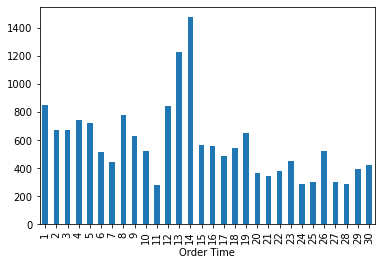

In [36]:
df_copie.groupby(df_copie["Order Time"].dt.day)['Order ID'].count().plot(kind="bar")

<AxesSubplot:xlabel='Order Time'>

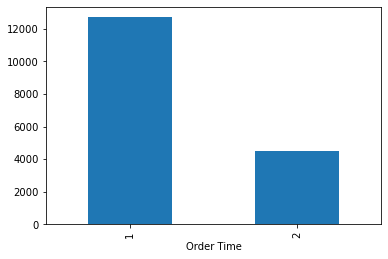

In [37]:
df_copie.groupby(df_copie["Order Time"].dt.month)['Order ID'].count().plot(kind="bar")

<AxesSubplot:xlabel='Order Time'>

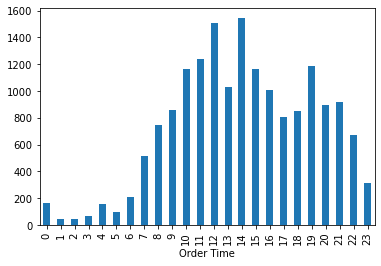

In [38]:
df_copie.groupby(df_copie["Order Time"].dt.hour)['Order ID'].count().plot(kind="bar")

In [39]:
df_copie['Order Month'] = df_copie['Order Time'].dt.month
df_copie['Order Day'] = df_copie['Order Time'].dt.day
df_copie['Order Day of Week'] = df_copie['Order Time'].dt.dayofweek
df_copie['Order Hour'] = df_copie['Order Time'].dt.hour
df_copie['Order Minute'] = df_copie['Order Time'].dt.minute

test_df_copie['Order Month'] = test_df_copie['Order Time'].dt.month
test_df_copie['Order Day'] = test_df_copie['Order Time'].dt.day
test_df_copie['Order Day of Week'] = test_df_copie['Order Time'].dt.dayofweek
test_df_copie['Order Hour'] = test_df_copie['Order Time'].dt.hour
df_copie['Order Minute'] = df_copie['Order Time'].dt.minute

In [40]:
df_copie.drop(['Order Time'], axis=1, inplace=True)
test_df_copie.drop(['Order Time'], axis=1, inplace=True)

In [41]:
train_df = df_copie
test_df = test_df_copie

In [42]:
# drop unnecessary columns
train_df.drop(['Product Name', 'Unit Price'], axis = 1, inplace = True)

## Conver county to numeric type

In [43]:
df_copie = train_df.copy()
test_df_copie = test_df.copy()

In [44]:
le = LabelEncoder()
df_copie['Category Name'] = le.fit_transform(df_copie['Category Name'])
df_copie['Customer Country'] = le.fit_transform(df_copie['Customer Country'])
df_copie['Order Status'] = le.fit_transform(df_copie['Order Status'])

In [45]:
test_df_copie['Category Name'] = le.fit_transform(test_df_copie['Category Name'])
test_df_copie['Customer Country'] = le.fit_transform(test_df_copie['Customer Country'])
test_df_copie['Order Status'] = le.fit_transform(test_df_copie['Order Status'])

In [46]:
test_df_copie[['Category Name','Customer Country', 'Order Status']].head()

,Category Name,Customer Country,Order Status
0,26,0,2
1,26,0,2
2,26,0,2
3,26,0,2
4,11,0,2


In [47]:
train_df = df_copie
test_df = test_df_copie

In [48]:
train_df.head()

,Order ID,Order Status,Category Name,Quantity,Total Price,Sub Total,Delivery Charge,Payment Method,Customer ID,Merchant,Customer Country,Purchase Again,Order Month,Order Day,Order Day of Week,Order Hour,Order Minute
0,8236617,3,117,30,14400.0,43650.0,200200,CASH_PAY,8392354.0,6158523,0,1,1,1,4,0,26
1,8236617,3,117,15,27000.0,43650.0,200200,CASH_PAY,8392354.0,6158523,0,1,1,1,4,0,26
2,8236617,3,117,5,2250.0,43650.0,200200,CASH_PAY,8392354.0,6158523,0,1,1,1,4,0,26
3,8236624,2,104,3,300.0,1460.0,700700,CARD_PAY,6359544.0,17654385,0,1,1,1,4,0,27
4,8236624,2,152,3,300.0,1460.0,700700,CARD_PAY,6359544.0,17654385,0,1,1,1,4,0,27


In [49]:
test_df.shape

(12013, 17)

In [50]:
def build_time_features(df):
    data = df.copy()
    # Time features
    data['Order Week Hour'] = data['Order Day of Week'] * 24 + data['Order Hour']

    data['Order Hour'] = data['Order Hour']
    #data['dispatch_minute'] = data['dispatch_minute']
    data['Order Day of Week'] = data['Order Day of Week']

    # Cyclicale time features
    data['dispatch_day_sin'] = np.sin(data['Order Day']*(2.*np.pi/31)) 
    data['dispatch_day_cos'] = np.cos(data['Order Day']*(2.*np.pi/31)) 
    data['dispatch_day_of_week_sin'] = np.sin(data['Order Day of Week']*(2.*np.pi/7)) 
    data['dispatch_day_of_week_cos'] = np.cos(data['Order Day of Week']*(2.*np.pi/7)) 
    data['dispatch_hour_sin'] = np.sin(data['Order Hour']*(2.*np.pi/23)) 
    data['dispatch_hour_cos'] = np.cos(data['Order Hour']*(2.*np.pi/23))
    return data

In [51]:
train_df = build_time_features(train_df)
test_df = build_time_features(test_df)

In [52]:
train  = train_df.groupby('Customer ID').agg({
  'Order ID': 'count',
  'Quantity': 'sum',
  'Merchant': 'count',
  'Total Price': 'sum',
  'Sub Total': 'sum',
  'Payment Method': 'count',
  # 'Delivery Charge': 'count',
  'Customer Country': 'max',
  'Category Name': 'sum',
  'Order Status': 'sum',
  # 'Order Month': 'sum',
  # 'Order Day': 'sum',
  # 'Order Day of Week': 'count',
  # 'Order Hour': 'count',
  'dispatch_day_sin': 'mean',
  'dispatch_day_cos': 'mean',
  'dispatch_day_of_week_sin': 'mean',
  'dispatch_day_of_week_cos': 'mean',
  'dispatch_hour_sin': 'mean',
  'dispatch_hour_cos': 'mean',
  'Purchase Again' : 'max',
})
train.head()

,Order ID,Quantity,Merchant,Total Price,Sub Total,Payment Method,Customer Country,Category Name,Order Status,dispatch_day_sin,dispatch_day_cos,dispatch_day_of_week_sin,dispatch_day_of_week_cos,dispatch_hour_sin,dispatch_hour_cos,Purchase Again
Customer ID,,,,,,,,,,,,,,,,
1629574.0,5,6,5,1588.0,2478.0,5,0,490,18,-0.223567,0.024862,-0.542093,-0.765279,-0.237747,-0.656293,1
1735264.0,1,1,1,3990.0,3990.0,1,0,98,4,0.790776,-0.612106,0.433884,-0.900969,0.631088,-0.775711,0
1755078.0,4,8,4,2621.0,5871.0,4,0,392,8,-0.116859,-0.617903,-0.195458,0.905872,-0.068083,-0.990686,0
1755834.0,8,408,8,12214.0,23344.0,8,0,797,26,0.778403,-0.332562,0.200239,-0.159685,-0.251227,-0.656271,1
1756892.0,4,4,4,1097.0,1696.0,4,0,392,7,0.784964,-0.209281,-0.520871,-0.519854,-0.714763,0.148530,1


In [53]:
test  = test_df.groupby('Customer ID').agg({
  'Order ID': 'count',
  'Quantity': 'sum',
  'Merchant': 'count',
  'Total Price': 'sum',
  'Sub Total': 'sum',
  'Payment Method': 'count',
  # 'Delivery Charge': 'count',
  'Customer Country': 'max',
  'Category Name': 'sum',
  'Order Status': 'sum',
  # 'Order Month': 'sum',
  # 'Order Day': 'sum',
  # 'Order Day of Week': 'count',
  # 'Order Hour': 'count',
  'dispatch_day_sin': 'mean',
  'dispatch_day_cos': 'mean',
  'dispatch_day_of_week_sin': 'mean',
  'dispatch_day_of_week_cos': 'mean',
  'dispatch_hour_sin': 'mean',
  'dispatch_hour_cos': 'mean'
})
test.head()

,Order ID,Quantity,Merchant,Total Price,Sub Total,Payment Method,Customer Country,Category Name,Order Status,dispatch_day_sin,dispatch_day_cos,dispatch_day_of_week_sin,dispatch_day_of_week_cos,dispatch_hour_sin,dispatch_hour_cos
Customer ID,,,,,,,,,,,,,,,
1786544.0,3,106,3,31914.0,56828.0,3,0,435,10,0.937752,0.347305,-0.974928,-0.222521,0.436322,0.890585
1790392.0,6,7,6,2260.0,6860.0,6,0,867,12,0.117857,-0.665803,-0.361570,-0.584141,0.837852,-0.536380
1792674.0,8,40,8,8360.0,16720.0,8,0,1037,16,0.285389,-0.332438,-0.330719,0.125000,-0.461421,-0.772991
1806334.0,4,10,4,3876.0,3876.0,4,0,540,11,0.123881,-0.044302,-0.265216,-0.350242,0.375077,-0.295282
1814650.0,2,6,2,1696.0,3392.0,2,0,290,10,0.571268,0.820763,0.974928,-0.222521,-0.816970,-0.576680


In [54]:
train.rename(columns={'Order ID': 'Order Count','Quantity': 'Total Quantity','Merchant': 'Merchant Count','Category Name': 'Categories','Payment Method': 'Payment Method Count','Delivery Charge': 'Delivery Charge Count'}, inplace=True)
test.rename(columns={'Order ID': 'Order Count','Quantity': 'Total Quantity','Merchant': 'Merchant Count','Category Name': 'Categories','Payment Method': 'Payment Method Count','Delivery Charge': 'Delivery Charge Count'}, inplace=True)

In [55]:
train.head()

,Order Count,Total Quantity,Merchant Count,Total Price,Sub Total,Payment Method Count,Customer Country,Categories,Order Status,dispatch_day_sin,dispatch_day_cos,dispatch_day_of_week_sin,dispatch_day_of_week_cos,dispatch_hour_sin,dispatch_hour_cos,Purchase Again
Customer ID,,,,,,,,,,,,,,,,
1629574.0,5,6,5,1588.0,2478.0,5,0,490,18,-0.223567,0.024862,-0.542093,-0.765279,-0.237747,-0.656293,1
1735264.0,1,1,1,3990.0,3990.0,1,0,98,4,0.790776,-0.612106,0.433884,-0.900969,0.631088,-0.775711,0
1755078.0,4,8,4,2621.0,5871.0,4,0,392,8,-0.116859,-0.617903,-0.195458,0.905872,-0.068083,-0.990686,0
1755834.0,8,408,8,12214.0,23344.0,8,0,797,26,0.778403,-0.332562,0.200239,-0.159685,-0.251227,-0.656271,1
1756892.0,4,4,4,1097.0,1696.0,4,0,392,7,0.784964,-0.209281,-0.520871,-0.519854,-0.714763,0.148530,1


In [56]:
X = train.drop(['Purchase Again'], axis=1)
y = train['Purchase Again']

In [57]:
test.head()

,Order Count,Total Quantity,Merchant Count,Total Price,Sub Total,Payment Method Count,Customer Country,Categories,Order Status,dispatch_day_sin,dispatch_day_cos,dispatch_day_of_week_sin,dispatch_day_of_week_cos,dispatch_hour_sin,dispatch_hour_cos
Customer ID,,,,,,,,,,,,,,,
1786544.0,3,106,3,31914.0,56828.0,3,0,435,10,0.937752,0.347305,-0.974928,-0.222521,0.436322,0.890585
1790392.0,6,7,6,2260.0,6860.0,6,0,867,12,0.117857,-0.665803,-0.361570,-0.584141,0.837852,-0.536380
1792674.0,8,40,8,8360.0,16720.0,8,0,1037,16,0.285389,-0.332438,-0.330719,0.125000,-0.461421,-0.772991
1806334.0,4,10,4,3876.0,3876.0,4,0,540,11,0.123881,-0.044302,-0.265216,-0.350242,0.375077,-0.295282
1814650.0,2,6,2,1696.0,3392.0,2,0,290,10,0.571268,0.820763,0.974928,-0.222521,-0.816970,-0.576680


# Model Building

In [68]:
# lightgbm classifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
model = LGBMClassifier(n_estimators=100, max_depth=2, random_state=42, n_jobs=-1, learning_rate=0.1)
model.fit(X, y)

LGBMClassifier(max_depth=2, random_state=42)

In [69]:
y_pred = model.predict(test)
test.shape
submission_df['Target'] = y_pred
submission_df.to_csv('submissionlgbm3.csv', index=False)
submission_df['Target'].value_counts()

0    679
1     88
Name: Target, dtype: int64